#  Prediction of Carbon monoxide (CO) emission in Gas-Turbines

The main objective of this notebbok is to use data to create a model that predict the Carbon monoxide emitted by gas-turbines used in power generation plants. 

The dataset was obtained from kaggle in the folowing link:https://www.kaggle.com/datasets/muniryadi/gasturbine-co-and-nox-emission-data 

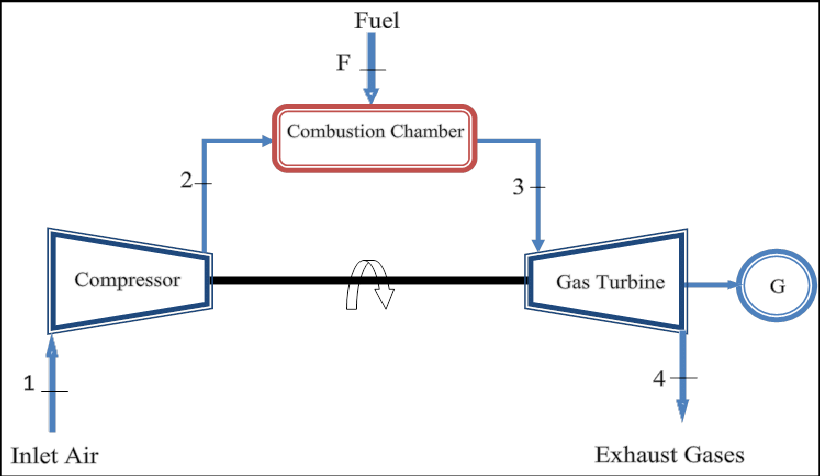

## EDA

### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

: 

### Importing the dataset

In [ ]:
raw_data = pd.read_csv('../data/gt_full.csv')

: 

In [ ]:
raw_data.head()

: 

### Deleting "Unnamend:0" column:

In [ ]:
raw_data.drop(columns = ['Unnamed: 0'], inplace = True)

: 

In [ ]:
raw_data.tail()

: 

### Changing the columns names:

<ul>
    <li>AT = Ambient temperature [°C]</li>
    <li>AP = Ambient pressure [mbar]</li>
    <li>AH = Ambient humidity [%]</li>
    <li>AFDP = Air filter difference pressure [mbar]</li>
    <li>GTEP = Gas turbine exhaust pressure [mbar]</li>
    <li>TIT = Turbine inlet temperature [°C]</li>
    <li>TAT = Turbine after temperature [°C]</li>
    <li>TEY = Turbine energy yield [MWh]</li>
    <li>CDP = Compressor discharge pressure [bar]</li>
    <li>CO = Carbon monoxide [mg/m³]</li>
    <li>NOx = Nitrogen oxides [mg/m³]</li>
</ul>


In [ ]:
new_names = {
    'AT': 'air_temp',
    'AP': 'air_press',
    'AH': 'air_hum',
    'AFDP': 'air_filt_dp',
    'CDP': 'comp_out_press',
    'TIT': 'turb_in_temp',
    'TAT': 'turb_out_temp',
    'GTEP': 'turb_out_press',
    'TEY': 'turb_energy',
    'NOX': 'NOx'
}

: 

In [ ]:
raw_data.rename(columns = new_names, inplace = True)

: 

### Transforming CDP unity to mbar

In [ ]:
raw_data['comp_out_press'] = raw_data['comp_out_press']*1000 

: 

In [ ]:
raw_data.head()

: 

### Getting dataset info

In [ ]:
raw_data.info()

: 

In [ ]:
plt.figure(figsize = (15,8))
sns.boxplot(data = raw_data)

: 

In [ ]:
raw_data.describe().round(3)

: 

### Correlation

In [ ]:
sns.pairplot(raw_data)

: 

In [ ]:
raw_data.corr(method = 'spearman')

: 

In [ ]:
sns.pairplot(raw_data, y_vars = ['CO'], 
             x_vars = ['air_filt_dp', 'turb_out_press', 'turb_in_temp', 'turb_energy', 'comp_out_press'])

: 

In [ ]:
sns.pairplot(raw_data, y_vars = ['NOx'], 
             x_vars = ['air_temp', 'CO'])

: 

### Observations:

CO emmission strong correlation:
<ul>
    <li>Air filter difference pressure;</li>
    <li>Turbine outlet pressure;</li>
    <li>Turbine inlet temperature;</li>
    <li>Turbine energy yeld;</li>
    <li>Compressor outlet pressure;</li>
</ul>

NOx emmission strong correlation:
<ul>
    <li>Air temperature;</li>
    <li>CO emmission;</li>
</ul>

### Feature selection

In [ ]:
data = raw_data[['air_filt_dp', 'turb_out_press', 'turb_in_temp', 'turb_energy', 'comp_out_press', 'CO', 'NOx']]

: 